In [96]:
# Import general
import pandas as pd
import numpy as np
import array

# Import para mapa
from matplotlib import pyplot
from matplotlib import colors
import pickle

# Import para clases
from abc import ABC

# Import para generar ruta
import copy

# Import para generar pedido
import random

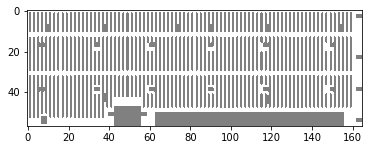

In [97]:
# Mapa Layout SPF

map_SPF = np.ones((57, 165), dtype=int)

for i in range(map_SPF.shape[1]):
    if (i % 2) == 0:
        map_SPF[:, i] = 0

map_SPF[0, :] = 0  # Fila 0 vacia
map_SPF[11:13, :] = 0  # Fila gruesa vacia
map_SPF[30:32, :] = 0  # Fila gruesa vacia
map_SPF[:, 160:165] = 0  # Columna gruesa final vacia
map_SPF[53:57, 0:38] = 0  # Zona inferior izquierda vacia
map_SPF[48:57, 38:42] = 0  #
map_SPF[43:47, 42:57] = 0  #
map_SPF[47:57, 43:55] = 1  # Hueco ocupado "exterior"
map_SPF[48:57, 56:63] = 0  #
map_SPF[48:50, 63:156] = 0  # Filas que separan la zona de recogida vacias
map_SPF[48:57, 156:164] = 0  #
map_SPF[50:57, 63:156] = 1  # Zona de recogida ocupada
map_SPF[51, 7:10] = 0  # Hueco encima de una escalera
# Huecos intercalados:
map_SPF[16:20, 32:37] = 0  # Hueco a
map_SPF[16:20, 58:63] = 0  # Hueco b
map_SPF[16:20, 88:93] = 0  # Hueco e
map_SPF[16:20, 114:119] = 0  # Hueco g
map_SPF[16:20, 146:151] = 0  # Hueco i
map_SPF[37:41, 32:37] = 0  # Hueco d
map_SPF[37:41, 58:63] = 0  # Hueco c
map_SPF[37:41, 88:93] = 0  # Hueco f
map_SPF[37:41, 114:119] = 0  # Hueco h
map_SPF[37:41, 146:151] = 0  # Hueco j
# Escaleras:
map_SPF[7:11, 10:12] = 1  #
map_SPF[7:11, 38:40] = 1  #
map_SPF[7:11, 74:76] = 1  #
map_SPF[7:11, 90:92] = 1  #
map_SPF[7:11, 118:120] = 1  #
map_SPF[7:11, 154:156] = 1  #
map_SPF[52:56, 7:10] = 1  #
map_SPF[41:45, 38:40] = 1  #
map_SPF[42:46, 118] = 1  #
# Cuadrados azules derecha:
map_SPF[2:4, 162:165] = 1  #
map_SPF[22:24, 162:165] = 1  #
map_SPF[38:40, 162:165] = 1  #
map_SPF[53:55, 162:165] = 1  #
# Cuadrados azules abajo:
map_SPF[50:52, 40:43] = 1  #
map_SPF[50:52, 56:59] = 1  #
# Columnas verdes:
map_SPF[16:18, 6:9] = 1  #
map_SPF[16:18, 33:36] = 1  #
map_SPF[16:18, 60:63] = 1  #
map_SPF[16:18, 89:92] = 1  #
map_SPF[16:18, 116:119] = 1  #
map_SPF[16:18, 149:152] = 1  #
map_SPF[38:40, 6:9] = 1  #
map_SPF[38:40, 33:36] = 1  #
map_SPF[38:40, 60:63] = 1  #
map_SPF[38:40, 89:92] = 1  #
map_SPF[38:40, 116:119] = 1  #
map_SPF[38:40, 149:152] = 1  #


list_SPF = map_SPF.tolist()


# Escritura en modo binario, vacía el fichero si existe
fichero = open("mapaTarancon_P1.pckl", "wb")

# Escribe la colección en el fichero
pickle.dump(list_SPF, fichero)

fichero.close()

"""
# Lectura en modo binario
fichero = open("mapaTarancon_P1.pckl", "rb")

# Cargamos los datos del fichero
lista_fichero = pickle.load(fichero)

fichero.close()
"""

colormap = colors.ListedColormap(["white", "grey"])
# entregando este problema a
pyplot.imshow(list_SPF, cmap=colormap)
pyplot.show()



In [98]:
# Funcion Calcular Ruta
# (i, j): origin
# (r, c): destination
from re import A


path = [] # solo hace falta declararla 1 vez
all_paths = [] # declararla siempre antes de llamar a la funcion

def find_paths(matrix, i, j, r, c):

    '''
    Esta funcion recibe:
        matrix: matriz que contiene el mapa (0 por donde puede ir y 1 por donde no)
        path: vector vacio que rellenar con la ruta
        (i, j): coordenadas de origen
        (r, c): coordenadas de destino
    Devuelve:
        all_paths: vector que contiene las variantes para una misma ruta (vector de vectores)
    
    CADA VEZ QUE SE LLAMA A LA FUNCION HAY QUE DECLARAR all_paths = []
    '''

    if matrix[i][j] == 1:
        return print('Error in origin')
    elif matrix[r][c] == 1:
        return print('Error in destination')
    
    path.append((i, j))
    
    t = 0
    x = 0
    q = 0

    while t == 0:

        d = 0
        l = 0
        u = 0
        p = 0
        x = x +1


        # move right
        if j+1 <= c and matrix[i][j+1] == 0:
            #find_paths(matrix,path,i,j+1,r,c)
            all_paths.append((i, j+1))
            j=j+1
            d = 1

        # move left
        if c <= j-1 and matrix[i][j-1] == 0:
            #find_paths(matrix,path,i,j-1,r,c)
            all_paths.append((i, j-1))
            j=j-1     
            l = 1

        # move down
        if i+1 <= r and matrix[i+1][j] == 0:  
            #find_paths(matrix,path,i+1,j,r,c)
            all_paths.append((i+1, j))
            i=i+1  
            p = 1        

        # move up
        if r <= i-1 and matrix[i-1][j] == 0:
            #find_paths(matrix,path,i-1,j,r,c)
            all_paths.append((i-1, j))
            i=i-1
            u = 1
        
        if x > 15:
            for q < len(all_paths)
            exit()

        if i == r and j == c:
            t = 1
            

    # if destination is reached print it
    if i == r and j == c:
        all_paths.append(copy.copy(path))
        print(path)
        path.pop()
        return all_paths

    # if none of the above is explorable or invalid index: backtrack
    

In [99]:
# Función Comprobar Ruta

def ComprobarRuta(route):
    """
    La idea es que reciba una ruta en forma de lista con coordenadas.
    Se sabe que la velocidad del robot es 0.9 m/s y se ha considerado que cada casilla mide 1.3X1.3 m^2.
    Así, se podrá saber, por tiempo, cuándo pasa el robot de una coordenada a otra, liberando las casillas.

    De momento, se considera que la ruta que se recibe ocupa todas las casillas en el momento de la comprobación.
    """
    ruta = route

    for indice, coordenada in enumerate(ruta):
        # Comprobar que la ruta es factible -> que cada coordenada es un 0 en la matriz
        x = coordenada[0]
        y = coordenada[1]
        if map_SPF[x, y] != 0:
            print("Error. La ruta no es factible.")
            return 0 # No funciona
            break

        else:
            index_ruta = indice
            print("Coordenada correcta.")
            

    if (index_ruta + 1) == len(ruta):
        # Significa que toda la ruta es válida. Se ordena al robot que la ejecute.
        for coordenada in ruta:
            x = coordenada[0]
            y = coordenada[1]
            map_SPF[x, y] = 1  # El robot ocupa las coordenadas de la ruta

        # Descomentar lo siguiente para guardar de verdad el nuevo plano en el fichero:
        list_SPF = map_SPF.tolist()
        # Escritura en modo binario, vacía el fichero si existe
        fichero = open("mapaTarancon_P1.pckl", "wb")
        # Escribe la colección en el fichero
        pickle.dump(list_SPF, fichero)
        fichero.close()
        colormap = colors.ListedColormap(["white", "grey"])
        # entregando este problema a
            
        pyplot.imshow(list_SPF, cmap=colormap)
        pyplot.show()
        
        return 1

In [100]:
print(map_SPF[26][48])
print(map_SPF[5][4])
find_paths(map_SPF, 0, 0, 26, 48)
print(all_paths)


0
0
[(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (12, 3), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (26, 4)]
[(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (12, 3), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4)]
[(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (12, 3), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4), (24, 4)]
[(0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (11, 3), (12, 3), (12, 4), (13, 4), (14, 4), (15, 4), (16, 4), (17, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (23, 4)]
[(0, 1), (

IndexError: pop from empty list